## Generate Figure 8 of the main paper

In [14]:
import pandas as pd
results = pd.concat([
    pd.read_csv(f'../experiments/output/cost_optimization_{i}_warm_start_depth_3_alt.csv') for i in range(50)
])

In [15]:
fixed_test_df = results[results['split'] == 'test'].melt(
    id_vars=['dataset', 'split', 'tree', 'cost_by_var', 'iter', 'tree_depth'], var_name='Method', value_name='Cost'
).sort_values('Method')

def niceify_method(row):
    if row["Method"] == 'max_cost_for_tree':
        return "Naive"
    elif row["Method"] == 'naive_cost':
        return "Path Based"
    elif row["Method"] == 'optimized_cost':
        return "Optimized"
    elif row["Method"] == 'greedy_cost_for_tree':
        return "Greedy"

def niceify_dataset(row):
    if row["dataset"] == 'coupon_full':
        return "Coupon"
    elif row["dataset"] == 'compas_complete':
        return "COMPAS"
    else:
        return " ".join(row['dataset'].split("_")).title()

fixed_test_df['Method'] = fixed_test_df.apply(niceify_method, axis=1)
fixed_test_df['Dataset'] = fixed_test_df.apply(niceify_dataset, axis=1)

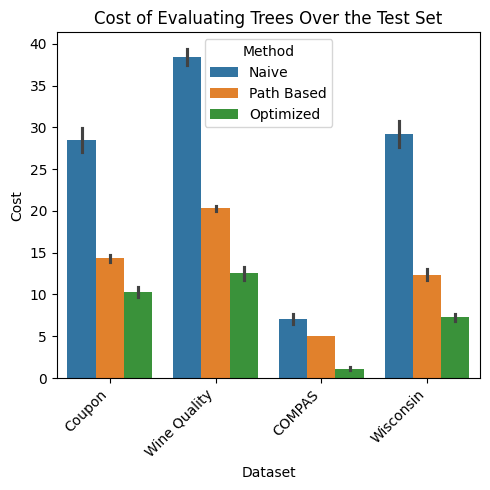

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt
fixed_test_df = pd.concat([
    fixed_test_df[fixed_test_df['Method'] != 'Greedy'],
    fixed_test_df[fixed_test_df['Method'] == 'Greedy']
], axis=0)
plt.figure(figsize=(5, 5))
sns.barplot(
    fixed_test_df[
        (fixed_test_df['dataset'].isin(['compas_complete', 'coupon_full', 'wine_quality', 'wisconsin']))
        & (fixed_test_df['Method'] != 'Greedy')
    ],
    hue='Method',
    y='Cost',
    x='Dataset',
)
plt.title("Cost of Evaluating Trees Over the Test Set")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("cost_sensitive.pdf")

### Generate similar figure over extra datasets

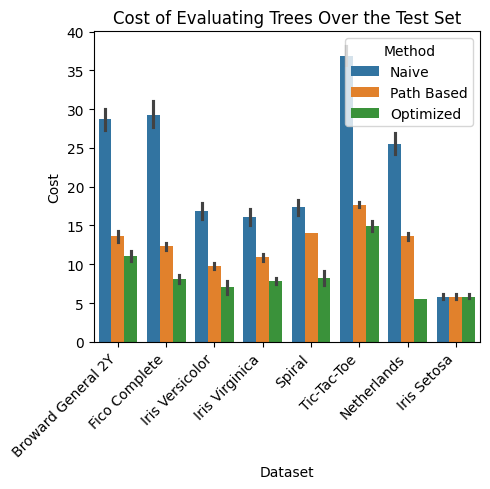

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))
sns.barplot(
    fixed_test_df[
        (~fixed_test_df['dataset'].isin(['compas_complete', 'coupon_full', 'wine_quality', 'wisconsin']))
        & (fixed_test_df['Method'] != 'Greedy')
    ],
    hue='Method',
    y='Cost',
    x='Dataset',
)
plt.title("Cost of Evaluating Trees Over the Test Set")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("cost_sensitive.pdf")

### And the supplement fig with an extra baseline

/tmp/ipykernel_1696337/328690990.py:12: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  g = sns.barplot(


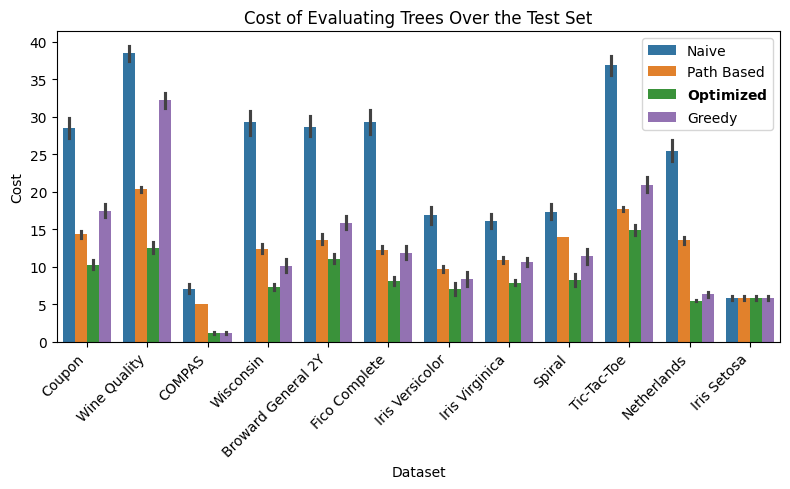

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
fixed_test_df = pd.concat([
    fixed_test_df[fixed_test_df['Method'] != 'Greedy'],
    fixed_test_df[fixed_test_df['Method'] == 'Greedy']
], axis=0)
plt.figure(figsize=(8, 5))

palette = sns.color_palette("tab10")
palette = palette[:3] + palette[4:]

g = sns.barplot(
    fixed_test_df,
    hue='Method',
    y='Cost',
    x='Dataset',
    palette=palette
)
# Get the legend handles and labels
handles, labels = g.get_legend_handles_labels()

# Bold the desired label
labels[2] = r'$\bf{Optimized}$'
# Create a new legend
g.legend(handles, labels)
plt.title("Cost of Evaluating Trees Over the Test Set")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("cost_sensitive.pdf")